# Distibució dades II

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

UNPROCESSED

In [11]:

# Carregar el fitxer
df = pd.read_csv('/Users/carlabatlle/Documents/practiques/data/RNAseq_un_merged.csv')
df=df.set_index(df.columns[0])

# Separar la primera i última columna
gene_ids = df.iloc[:, 0]  # Primera columna (identificadors de mostra)
conditions = df.iloc[:, -1]  # Última columna (Condició)
df_values = df.iloc[:, 1:-1]  # Dades d'expressió gènica

# Filtrar gens amb expressió nul·la en totes les mostres
df_filtered = df_values.loc[:, (df_values != 0).any(axis=0)]  

# Aplicar la transformació log2(x + 1)
df_log2 = np.log2(df_filtered + 1)

# Reconstruir el dataframe afegint de nou `record_id` i `Condició`
df_log2.insert(0, "record_id", gene_ids)
df_log2["Condició"] = conditions


In [23]:
df_filtered

,10,100,1000,10000,10001,10002,10003,100033411,100037417,10004,...,9986,9987,9988,9989,999,9990,9991,9992,9993,9994
record_id,,,,,,,,,,,,,,,,,,,,,
R032,0,2,0,35,3,1,0,0,0,2,...,1,2,3,2957,38,4,86,0,13,394
R036,0,0,0,18,0,1,0,0,0,6,...,0,0,0,2720,12,0,36,0,2,335
R047,0,93,901,1682,515,2,127,0,41,37,...,453,13698,2033,3402,19544,419,8414,0,2368,239
R049,4,102,58,835,528,2,58,0,33,16,...,594,14431,1399,3003,16453,357,8941,0,2424,312
R050,0,59,511,963,463,1,59,0,45,39,...,528,12897,1303,2333,14621,264,5199,0,2041,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R419,0,16,318,2005,235,2,123,2,25,46,...,199,3502,1250,849,3355,494,2044,1,2513,352
R420,0,28,424,1478,106,7,251,0,16,38,...,229,3544,997,984,4471,447,2470,0,2238,232
R421,0,42,253,1634,123,15,405,0,13,63,...,251,4822,1146,1118,3492,455,2630,0,2374,222


In [12]:
df

,1,10,100,1000,10000,10001,10002,10003,100033411,100037417,...,9987,9988,9989,999,9990,9991,9992,9993,9994,Condició
record_id,,,,,,,,,,,,,,,,,,,,,
R032,0,0,2,0,35,3,1,0,0,0,...,2,3,2957,38,4,86,0,13,394,SA
R036,0,0,0,0,18,0,1,0,0,0,...,0,0,2720,12,0,36,0,2,335,SA
R047,15,0,93,901,1682,515,2,127,0,41,...,13698,2033,3402,19544,419,8414,0,2368,239,SA
R049,3,4,102,58,835,528,2,58,0,33,...,14431,1399,3003,16453,357,8941,0,2424,312,SA
R050,0,0,59,511,963,463,1,59,0,45,...,12897,1303,2333,14621,264,5199,0,2041,105,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R419,36,0,16,318,2005,235,2,123,2,25,...,3502,1250,849,3355,494,2044,1,2513,352,SA
R420,4,0,28,424,1478,106,7,251,0,16,...,3544,997,984,4471,447,2470,0,2238,232,SA
R421,12,0,42,253,1634,123,15,405,0,13,...,4822,1146,1118,3492,455,2630,0,2374,222,SA


In [15]:
prova = df.iloc[:10, :100]

<Axes: xlabel='record_id'>

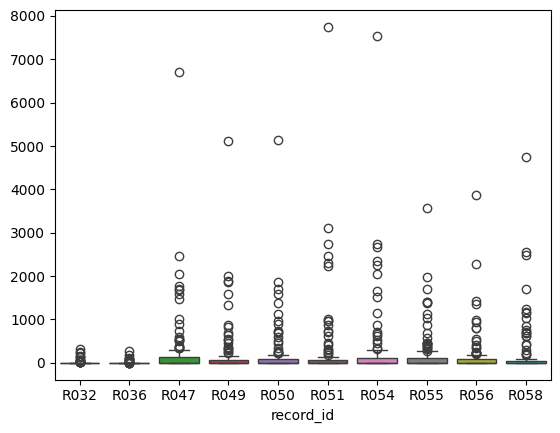

In [17]:
sns.boxplot(prova.T)

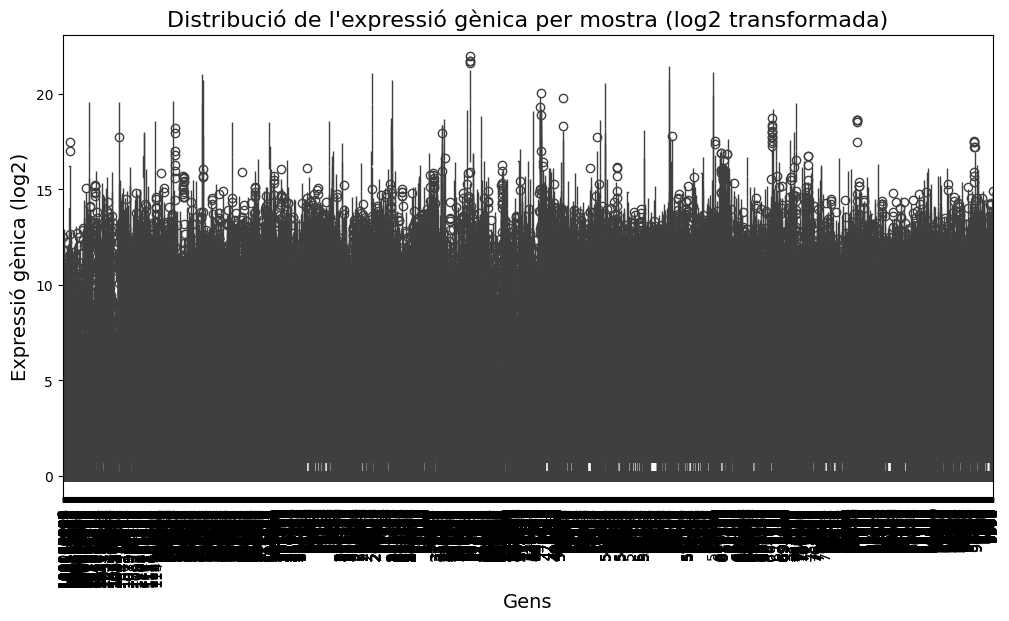

In [ ]:

# Representació de la distribució de l'expressió gènica (transformada amb log2)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_log2.iloc[:, 1:-1])  # Excloem la primera columna (record_id) i l'última (Condició)

# Afegir nom als eixos
plt.xlabel("Gens", fontsize=14)
plt.ylabel("Expressió gènica (log2)", fontsize=14)

# Afegir ticks correctament
plt.xticks(ticks=range(len(df_log2.columns[1:-1])), labels=df_log2.columns[1:-1], rotation=90)

plt.title("Distribució de l'expressió gènica per mostra (log2 transformada)", fontsize=16)

plt.show()


In [ ]:
prova["Condició"] = conditions
# Filtrar les dades segons la condició (sans i Type2)
df_sa = prova[prova["Condició"] == "SA"]  # Pacients sans
df_type2 = prova[prova["Condició"] == "Type2"]  # Pacients amb diabetis tipus 2


<Axes: xlabel='record_id'>

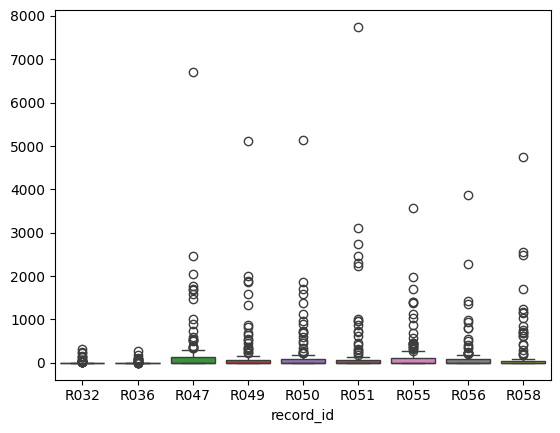

In [21]:
sns.boxplot(data=df_sa.iloc[:, :-1].T)

<Axes: xlabel='record_id'>

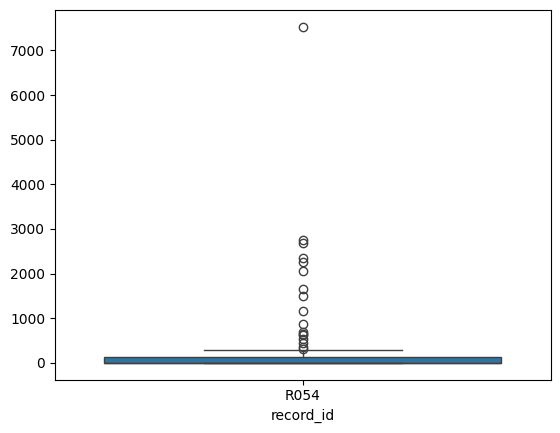

In [22]:
sns.boxplot(data=df_type2.iloc[:, :-1].T)

In [26]:
df_filtered["Condició"] = conditions
df_sa = df_filtered[df_filtered["Condició"] == "SA"]  # Pacients sans
df_type2 = df_filtered[df_filtered["Condició"] == "Type2"]  # Pacients amb diabetis tipus 2

df_sa_sample=df_sa.iloc[:10]
df_type2_sample=df_type2.iloc[:10]

/var/folders/b8/rdg06f9d2dq8b5jy2qvvln500000gn/T/ipykernel_13787/1533646678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Condició"] = conditions


<Axes: xlabel='record_id'>

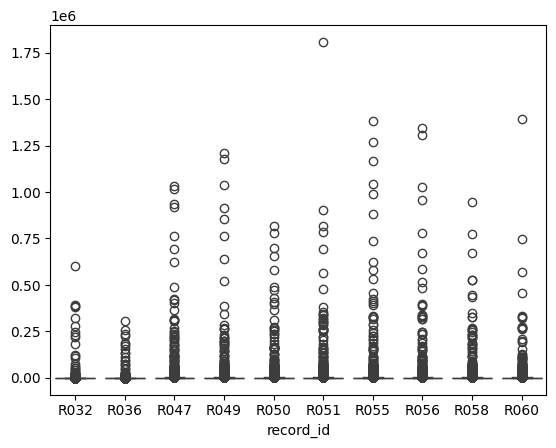

In [35]:

sns.boxplot(data=df_sa_sample.iloc[:, :-1].T)

<Axes: xlabel='record_id'>

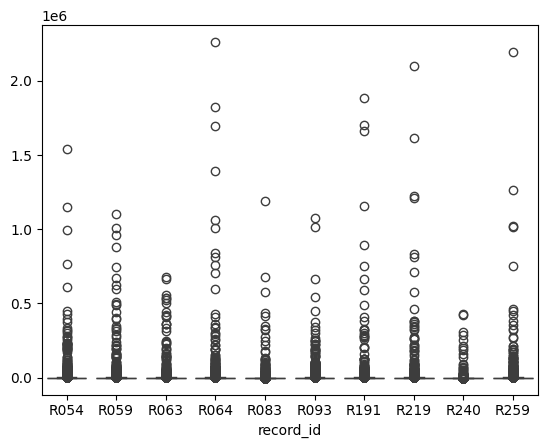

In [36]:
sns.boxplot(data=df_type2_sample.iloc[:, :-1].T)

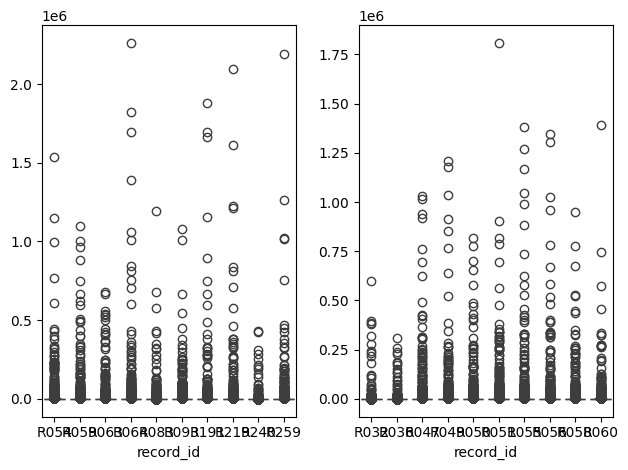

In [34]:
plt.subplot(1, 2, 2)
sns.boxplot(data=df_sa_sample.iloc[:, :-1].T)

plt.subplot(1, 2, 1)  # 1 fila, 2 columnes, primer gràfic
sns.boxplot(data=df_type2_sample.iloc[:, :-1].T)

plt.tight_layout()
plt.show()

In [ ]:
df_combined = pd.concat([df_sa_sample, df_type2_sample], axis=0)

In [97]:
df_combined

,10,100,1000,10000,10001,10002,10003,100033411,100037417,10004,...,9987,9988,9989,999,9990,9991,9992,9993,9994,Condició
record_id,,,,,,,,,,,,,,,,,,,,,
R032,0,2,0,35,3,1,0,0,0,2,...,2,3,2957,38,4,86,0,13,394,SA
R036,0,0,0,18,0,1,0,0,0,6,...,0,0,2720,12,0,36,0,2,335,SA
R047,0,93,901,1682,515,2,127,0,41,37,...,13698,2033,3402,19544,419,8414,0,2368,239,SA
R049,4,102,58,835,528,2,58,0,33,16,...,14431,1399,3003,16453,357,8941,0,2424,312,SA
R050,0,59,511,963,463,1,59,0,45,39,...,12897,1303,2333,14621,264,5199,0,2041,105,SA
R051,0,88,140,719,975,3,6,0,46,11,...,26523,1613,5805,25919,572,10194,0,5157,376,SA
R055,0,37,1037,1391,453,0,273,0,3,44,...,12724,1466,2577,14029,220,6103,1,1998,208,SA
R056,0,71,233,813,335,13,106,0,32,33,...,8801,886,2706,15036,291,3159,0,2427,86,SA
R058,0,39,695,1244,629,0,80,0,8,29,...,16038,1592,3310,11450,544,20974,0,1891,605,SA


<Axes: xlabel='record_id', ylabel='Expression'>

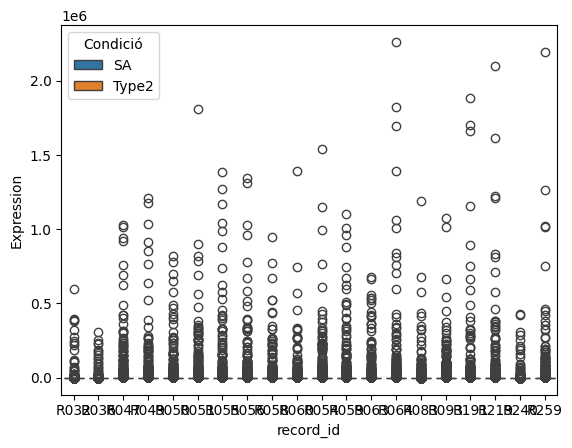

In [58]:
import numpy as np
# Restablir l'index per convertir 'record_id' en una columna normal
df_combined_reset = df_combined.reset_index()

# Convertir a format llarg amb la columna 'record_id' com a identificador
df_long = df_combined_reset.melt(id_vars=["record_id", "Condició"], var_name="Gene", value_name="Expression")

# Crear un boxplot amb pacients a l'eix X i condicions separades per hue

sns.boxplot(data=((df_long)), x="record_id", y="Expression", hue="Condició")

<Axes: xlabel='record_id', ylabel='Expression'>

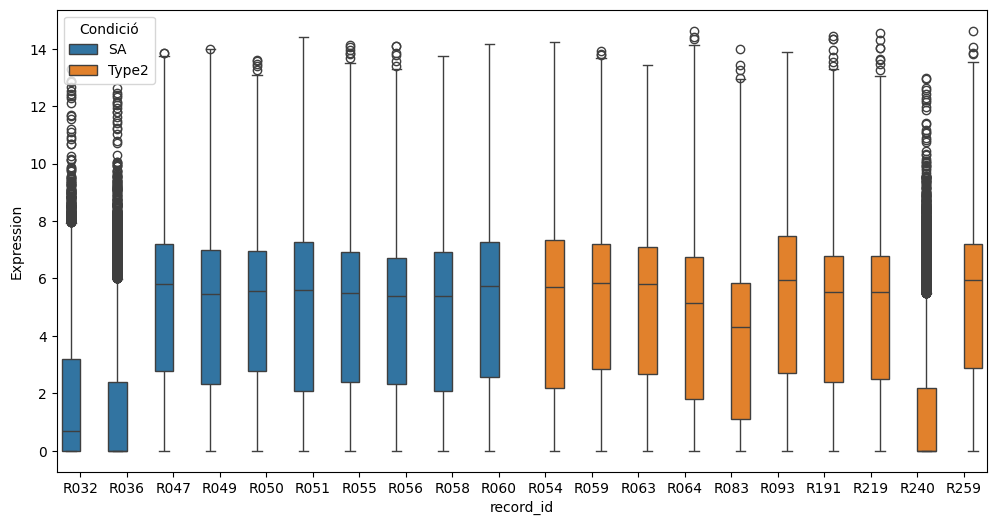

In [67]:
df_combined_reset = df_combined.reset_index()
gene_columns = df_combined_reset.columns[1:-1]  # Excloem 'Condició' al final

# Aplicar la transformació log2 només a les columnes numèriques d'expressions gèniques
df_combined_reset[gene_columns] = np.log((df_combined_reset[gene_columns])+1)  # log2(x+1)

# Convertir a format llarg amb la columna 'record_id' com a identificador
df_long = df_combined_reset.melt(id_vars=["record_id", "Condició"], var_name="Gene", value_name="Expression")

# Filtrar les mostres per condició
df_sa = df_long[df_long['Condició'] == 'SA']
df_type2 = df_long[df_long['Condició'] == 'Type2']

# Concatenar les mostres de les dues condicions
df_combined_sample = pd.concat([df_sa, df_type2])

# Crear el gràfic de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_combined_sample, x="record_id", y="Expression", hue="Condició", dodge=True)


In [94]:
df_combined_sample

,record_id,Condició,Gene,Expression
0,R032,SA,10,0.000000
1,R036,SA,10,0.000000
2,R047,SA,10,0.000000
3,R049,SA,10,1.609438
4,R050,SA,10,0.000000
...,...,...,...,...
393015,R093,Type2,9994,6.003887
393016,R191,Type2,9994,5.327876
393017,R219,Type2,9994,5.220356
393018,R240,Type2,9994,4.605170


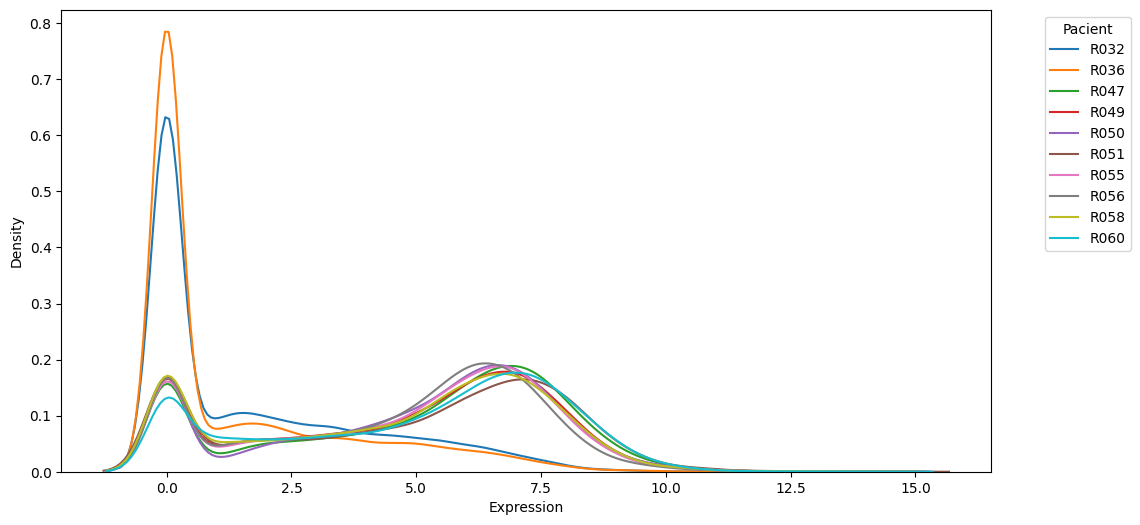

In [90]:
#Sa
r032 = df_combined_sample[df_combined_sample["record_id"] == "R032"]
r036 = df_combined_sample[df_combined_sample["record_id"] == "R036"]
r047 = df_combined_sample[df_combined_sample["record_id"] == "R047"]
r049 = df_combined_sample[df_combined_sample["record_id"] == "R049"]
r050 = df_combined_sample[df_combined_sample["record_id"] == "R050"]
r051 = df_combined_sample[df_combined_sample["record_id"] == "R051"]
r055 = df_combined_sample[df_combined_sample["record_id"] == "R055"]
r056 = df_combined_sample[df_combined_sample["record_id"] == "R056"]
r058 = df_combined_sample[df_combined_sample["record_id"] == "R058"]
r060 = df_combined_sample[df_combined_sample["record_id"] == "R060"]

#Gràfic
plt.figure(figsize=(12, 6))
sns.kdeplot(r032["Expression"], label="R032", color="#1f77b4")  # Blau
sns.kdeplot(r036["Expression"], label="R036", color="#ff7f0e")  # Taronja
sns.kdeplot(r047["Expression"], label="R047", color="#2ca02c")  # Verd
sns.kdeplot(r049["Expression"], label="R049", color="#d62728")  # Vermell
sns.kdeplot(r050["Expression"], label="R050", color="#9467bd")  # Morat
sns.kdeplot(r051["Expression"], label="R051", color="#8c564b")  # Marró
sns.kdeplot(r055["Expression"], label="R055", color="#e377c2")  # Rosa
sns.kdeplot(r056["Expression"], label="R056", color="#7f7f7f")  # Gris
sns.kdeplot(r058["Expression"], label="R058", color="#bcbd22")  # Groc
sns.kdeplot(r060["Expression"], label="R060", color="#17becf")  # Cian
plt.legend(title="Pacient", bbox_to_anchor=(1.05, 1), loc='upper left')


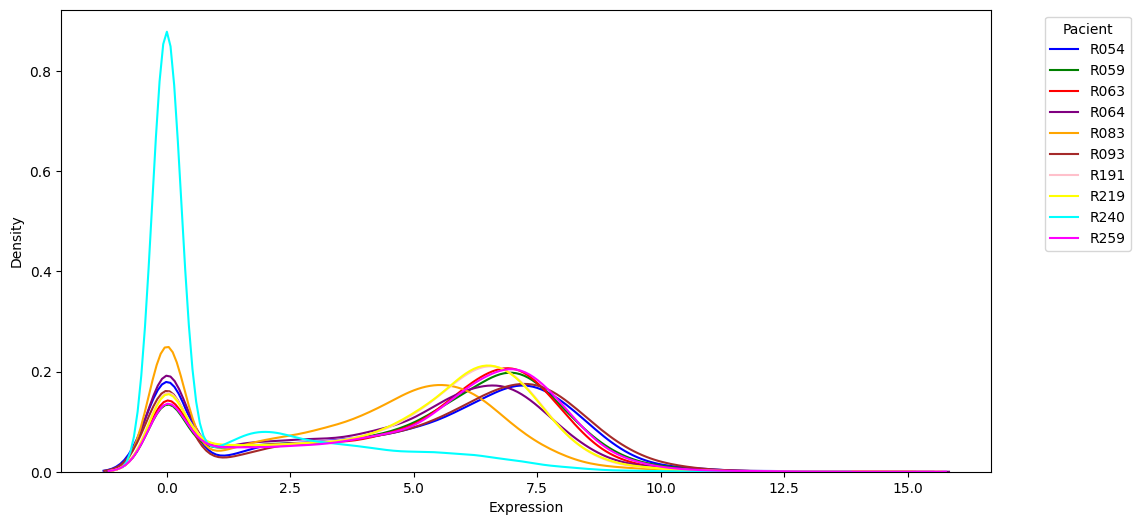

In [ ]:
#Type 2
r054 = df_combined_sample[df_combined_sample["record_id"] == "R054"]
r059 = df_combined_sample[df_combined_sample["record_id"] == "R059"]
r063 = df_combined_sample[df_combined_sample["record_id"] == "R063"]
r064 = df_combined_sample[df_combined_sample["record_id"] == "R064"]
r083 = df_combined_sample[df_combined_sample["record_id"] == "R083"]
r093 = df_combined_sample[df_combined_sample["record_id"] == "R093"]
r191 = df_combined_sample[df_combined_sample["record_id"] == "R191"]
r219 = df_combined_sample[df_combined_sample["record_id"] == "R219"]
r240 = df_combined_sample[df_combined_sample["record_id"] == "R240"]
r259 = df_combined_sample[df_combined_sample["record_id"] == "R259"]

#Gràfic
plt.figure(figsize=(12, 6))
sns.kdeplot(r054["Expression"], label="R054", color="blue")
sns.kdeplot(r059["Expression"], label="R059", color="green")
sns.kdeplot(r063["Expression"], label="R063", color="red")
sns.kdeplot(r064["Expression"], label="R064", color="purple")
sns.kdeplot(r083["Expression"], label="R083", color="orange")
sns.kdeplot(r093["Expression"], label="R093", color="brown")
sns.kdeplot(r191["Expression"], label="R191", color="pink")
sns.kdeplot(r219["Expression"], label="R219", color="yellow")
sns.kdeplot(r240["Expression"], label="R240", color="cyan")
sns.kdeplot(r259["Expression"], label="R259", color="magenta")
plt.legend(title="Pacient", bbox_to_anchor=(1.05, 1), loc='upper left')


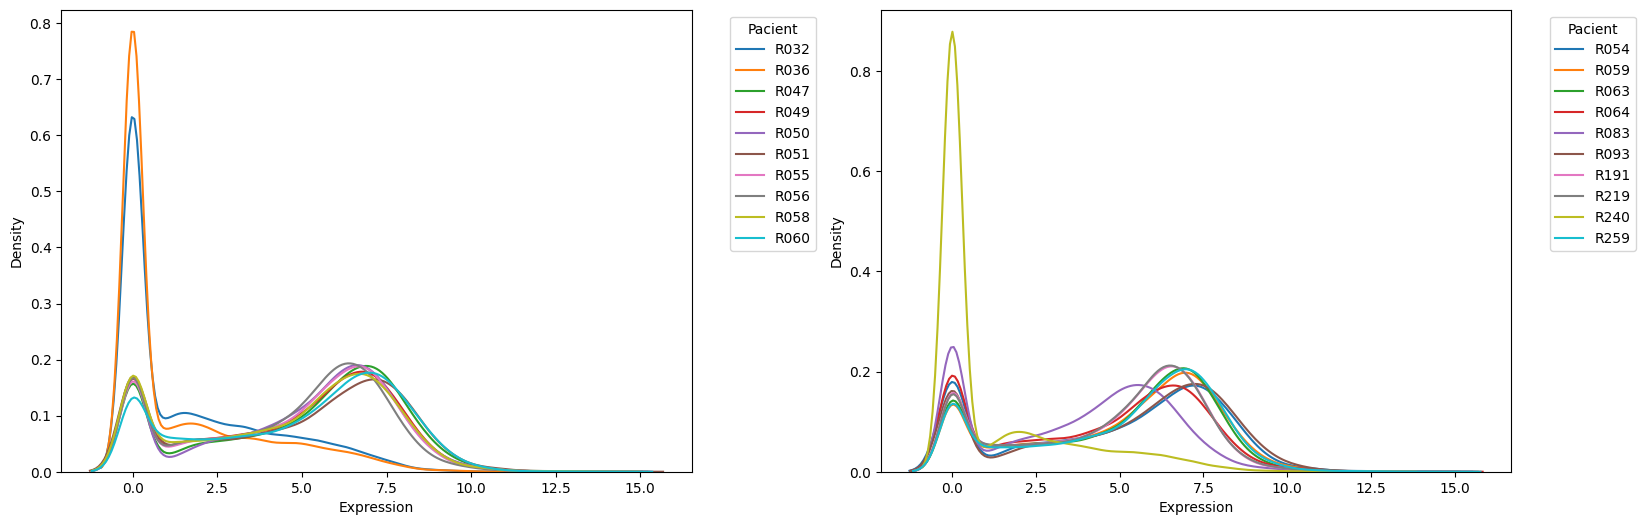

In [93]:
# dos gràfics 

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Dibuixar el primer conjunt de pacients
sns.kdeplot(r032["Expression"], label="R032", color="#1f77b4", ax=axes[0])  # Blau
sns.kdeplot(r036["Expression"], label="R036", color="#ff7f0e", ax=axes[0])  # Taronja
sns.kdeplot(r047["Expression"], label="R047", color="#2ca02c", ax=axes[0])  # Verd
sns.kdeplot(r049["Expression"], label="R049", color="#d62728", ax=axes[0])  # Vermell
sns.kdeplot(r050["Expression"], label="R050", color="#9467bd", ax=axes[0])  # Morat
sns.kdeplot(r051["Expression"], label="R051", color="#8c564b", ax=axes[0])  # Marró
sns.kdeplot(r055["Expression"], label="R055", color="#e377c2", ax=axes[0])  # Rosa
sns.kdeplot(r056["Expression"], label="R056", color="#7f7f7f", ax=axes[0])  # Gris
sns.kdeplot(r058["Expression"], label="R058", color="#bcbd22", ax=axes[0])  # Groc
sns.kdeplot(r060["Expression"], label="R060", color="#17becf", ax=axes[0])  # Cian

axes[0].legend(title="Pacient", bbox_to_anchor=(1.05, 1), loc='upper left')


sns.kdeplot(r054["Expression"], label="R054", color="#1f77b4", ax=axes[1])  # Blau
sns.kdeplot(r059["Expression"], label="R059", color="#ff7f0e", ax=axes[1])  # Taronja
sns.kdeplot(r063["Expression"], label="R063", color="#2ca02c", ax=axes[1])  # Verd
sns.kdeplot(r064["Expression"], label="R064", color="#d62728", ax=axes[1])  # Vermell
sns.kdeplot(r083["Expression"], label="R083", color="#9467bd", ax=axes[1])  # Morat
sns.kdeplot(r093["Expression"], label="R093", color="#8c564b", ax=axes[1])  # Marró
sns.kdeplot(r191["Expression"], label="R191", color="#e377c2", ax=axes[1])  # Rosa
sns.kdeplot(r219["Expression"], label="R219", color="#7f7f7f", ax=axes[1])  # Gris
sns.kdeplot(r240["Expression"], label="R240", color="#bcbd22", ax=axes[1])  # Groc
sns.kdeplot(r259["Expression"], label="R259", color="#17becf", ax=axes[1])  # Cian

axes[1].legend(title="Pacient", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(wspace=0.3, right=0.85)
plt.show()


PCA

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [100]:
df_combined

,10,100,1000,10000,10001,10002,10003,100033411,100037417,10004,...,9987,9988,9989,999,9990,9991,9992,9993,9994,Condició
record_id,,,,,,,,,,,,,,,,,,,,,
R032,0,2,0,35,3,1,0,0,0,2,...,2,3,2957,38,4,86,0,13,394,SA
R036,0,0,0,18,0,1,0,0,0,6,...,0,0,2720,12,0,36,0,2,335,SA
R047,0,93,901,1682,515,2,127,0,41,37,...,13698,2033,3402,19544,419,8414,0,2368,239,SA
R049,4,102,58,835,528,2,58,0,33,16,...,14431,1399,3003,16453,357,8941,0,2424,312,SA
R050,0,59,511,963,463,1,59,0,45,39,...,12897,1303,2333,14621,264,5199,0,2041,105,SA
R051,0,88,140,719,975,3,6,0,46,11,...,26523,1613,5805,25919,572,10194,0,5157,376,SA
R055,0,37,1037,1391,453,0,273,0,3,44,...,12724,1466,2577,14029,220,6103,1,1998,208,SA
R056,0,71,233,813,335,13,106,0,32,33,...,8801,886,2706,15036,291,3159,0,2427,86,SA
R058,0,39,695,1244,629,0,80,0,8,29,...,16038,1592,3310,11450,544,20974,0,1891,605,SA


In [120]:
df_combined_reset = df_combined.reset_index()
expression = df_combined_reset.drop(columns=["Condició", "record_id"])  
condition = df_combined_reset["Condició"] 

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(expression) 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=["Component Principal 1", "Component Principal 2"])
df_pca["Condició"] = condition

In [122]:
df_pca

,Component Principal 1,Component Principal 2,Condició
0,-171.974917,-9.640095,SA
1,-167.272541,-16.837410,SA
2,56.212269,25.075254,SA
3,11.217867,-46.358812,SA
4,14.256641,0.148988,SA
5,68.027587,-81.532147,SA
6,3.494492,6.142624,SA
7,-21.976595,19.776963,SA
8,12.545479,-53.956699,SA
9,87.593420,-34.843900,SA


<Axes: xlabel='Component Principal 1', ylabel='Component Principal 2'>

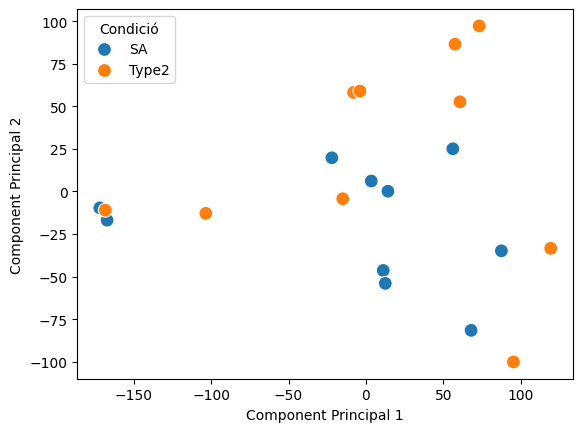

In [126]:
sns.scatterplot(x="Component Principal 1", y="Component Principal 2", hue="Condició", data=df_pca, s=100)

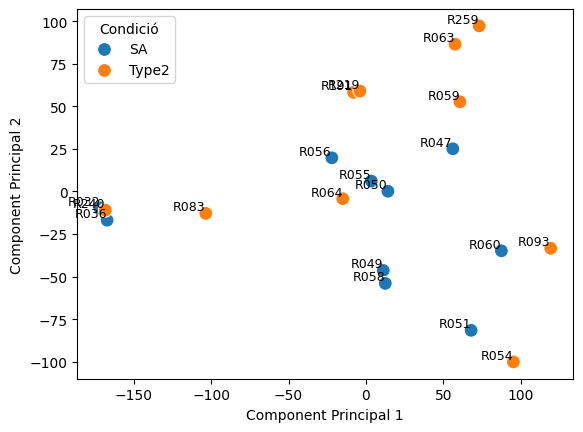

In [131]:

sns.scatterplot(x="Component Principal 1", y="Component Principal 2", hue="Condició", data=df_pca, s=100)

df_pca["record_id"] = df_combined_reset["record_id"]

for i in range(df_pca.shape[0]):
    plt.text(df_pca["Component Principal 1"].iloc[i], df_pca["Component Principal 2"].iloc[i], 
             df_pca["record_id"].iloc[i], fontsize=9, ha='right', va='bottom')
    
    



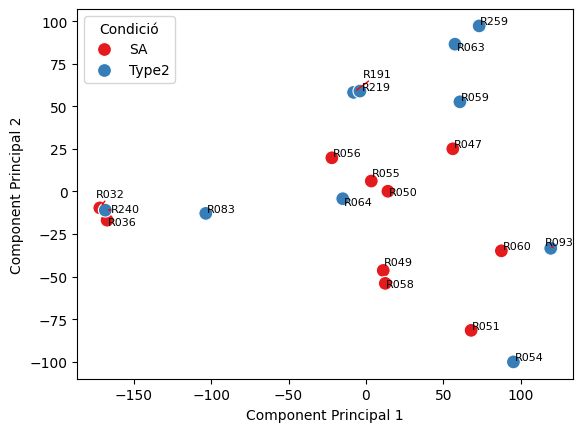

In [138]:
from adjustText import adjust_text


sns.scatterplot(x="Component Principal 1", y="Component Principal 2", hue="Condició", data=df_pca, s=100, palette="Set1")

texts = []
for i in range(df_pca.shape[0]):
    text = plt.text(df_pca["Component Principal 1"].iloc[i], 
                    df_pca["Component Principal 2"].iloc[i], 
                    df_pca["record_id"].iloc[i], 
                    fontsize=8)
    texts.append(text)


adjust_text(texts, arrowprops=dict(arrowstyle="->", color='red'))

plt.show()


UMAP

In [140]:
import umap
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
X_scaled

array([[-0.5       , -1.14419791, -1.03194396, ..., -0.37482076,
        -1.64298778,  0.46793942],
       [-0.5       , -1.17951266, -1.03194396, ..., -0.37482076,
        -1.65024902,  0.14987   ],
       [-0.5       ,  0.46262323,  1.13260384, ..., -0.37482076,
        -0.08842211, -0.36766669],
       ...,
       [-0.5       ,  1.01000186, -0.74606029, ..., -0.37482076,
        -0.02637151, -0.66417208],
       [-0.5       , -1.16185529, -1.03194396, ..., -0.37482076,
        -1.64298778, -1.12240769],
       [ 2.        ,  1.13360349,  0.28215998, ..., -0.37482076,
         0.386199  ,  0.23612611]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<Axes: xlabel='UMAP 1', ylabel='UMAP 2'>

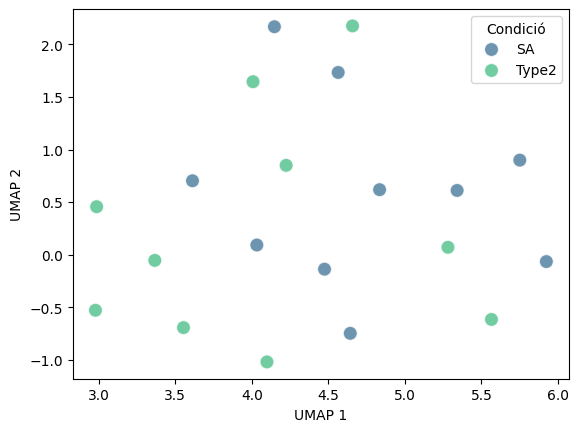

In [ ]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled) 


df_umap = pd.DataFrame(X_umap, columns=["UMAP 1", "UMAP 2"])
df_umap["Condició"] = condition 

sns.scatterplot(x="UMAP 1", y="UMAP 2", hue="Condició", data=df_umap, palette="viridis", s=100, alpha=0.7)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


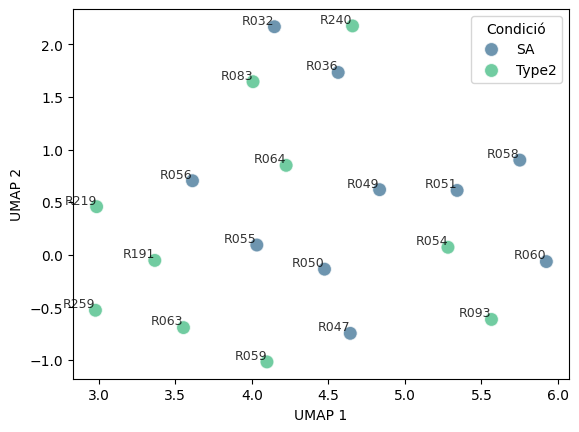

In [143]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)  


df_umap = pd.DataFrame(X_umap, columns=["UMAP 1", "UMAP 2"])
df_umap["Condició"] = condition  
df_umap["record_id"] = df_combined_reset["record_id"]

sns.scatterplot(x="UMAP 1", y="UMAP 2", hue="Condició", data=df_umap, palette="viridis", s=100, alpha=0.7)

for i, row in df_umap.iterrows():
    plt.text(row["UMAP 1"], row["UMAP 2"], df_umap["record_id"][i], fontsize=9, alpha=0.8, 
             ha='right', va='bottom')

# High varibility genes

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap

In [182]:
df_p=pd.read_csv('/Users/carlabatlle/Documents/practiques/data/RNAseq_p_merged.csv')

In [ ]:
df_genes_clean_p = df_p.drop(columns=['record_id', 'Condició'])
df_genes_clean_p = df_genes_clean_p.apply(pd.to_numeric, errors='coerce')

mean_expression_p = df_genes_clean_p.mean(axis=0)  
std_expression_p = df_genes_clean_p.std(axis=0)
std_normalized_p = std_expression_p / mean_expression_p

stats_p = pd.DataFrame({
    'mean': mean_expression_p,
    'std': std_expression_p,
    'std_normalized': std_normalized_p
})
sorted_stats_p = stats_p.sort_values(by='std_normalized', ascending=False)
top_high_variability_genes_p = sorted_stats_p.head(30)
top_high_variability_genes_p




,mean,std,std_normalized
7134,0.002699,0.904315,335.110700
30818,0.006047,0.841621,139.179552
49,0.007549,1.005256,133.157075
140578,0.008726,1.049521,120.268825
2528,0.008603,0.991356,115.236893
10673,0.008167,0.871789,106.749061
170371,0.011919,1.068531,89.651790
23349,0.013974,1.219823,87.291763
402569,0.020657,1.695973,82.100669
135152,0.012768,0.972795,76.188718


In [191]:
df_un=pd.read_csv('/Users/carlabatlle/Documents/practiques/data/RNAseq_un_merged.csv')

df_values = df.iloc[:, 1:-1]
conditions = df.iloc[:, -1]
gene_ids = df.iloc[:, 0]
df_filtered = df_values.loc[:, (df_values != 0).any(axis=0)]  


In [195]:
df_genes_clean_un = df_un.drop(columns=['record_id', 'Condició'])
df_genes_clean_un = df_genes_clean_un.apply(pd.to_numeric, errors='coerce') 

mean_expression_un = df_genes_clean_un.mean(axis=0)
std_expression_un = df_genes_clean_un.std(axis=0)
sum_expression_un = df_genes_clean_un.sum(axis=0)
std_normalized_un = std_expression_un / mean_expression_un

stats_un = pd.DataFrame({
    'mean': mean_expression_un,
    'std': std_expression_un,
    'sum': sum_expression_un,
    'std_normalized': std_normalized_un
})  
sorted_stats_un = stats_un.sort_values(by='std_normalized', ascending=False)
top_high_variability_genes_un = sorted_stats_un.head(30)
top_high_variability_genes_un


    

,mean,std,sum,std_normalized
574499,0.024,0.268328,3,11.18034
407041,0.048,0.536656,6,11.18034
406892,0.024,0.268328,3,11.18034
100506421,0.024,0.268328,3,11.18034
254879,0.024,0.268328,3,11.18034
390892,0.024,0.268328,3,11.18034
54860,0.048,0.536656,6,11.18034
112268441,0.024,0.268328,3,11.18034
407000,0.048,0.536656,6,11.18034
100129278,0.024,0.268328,3,11.18034


In [203]:
# Calcular el 20è percentil de les sumes
percentil_20 = np.percentile(sum_expression_un, 20)

# Filtrar els gens que tinguin una suma superior al 20è percentil
df_filtered = df_values.loc[:, sum_expression_un > percentil_20]

# Mostrar el resultat
print(df_filtered)

           100  1000  10000  10001  10003  100037417  10004  100048912  10005  \
record_id                                                                       
R032         2     0     35      3      0          0      2         20    230   
R036         0     0     18      0      0          0      6          6     64   
R047        93   901   1682    515    127         41     37         34    348   
R049       102    58    835    528     58         33     16         14    235   
R050        59   511    963    463     59         45     39         11    219   
...        ...   ...    ...    ...    ...        ...    ...        ...    ...   
R419        16   318   2005    235    123         25     46         62    198   
R420        28   424   1478    106    251         16     38         76    177   
R421        42   253   1634    123    405         13     63         91    174   
R424        48   357   1079    181    172         18     51         35    167   
R425        31   391   1562 

In [196]:
# Definir el percentil
percentil = 20

# Calcular el percentil per a cada gen
percentil_value = df_values.apply(lambda x: np.percentile(x, percentil), axis=0)

# Calcular la proporció de 0 per a cada gen
zero_proportion = (df_values == 0).mean(axis=0)

# Filtrar gens que tinguin més del 20% de zeros o que estiguin per sota del percentil
df_filtered = df_values.loc[:, (zero_proportion < 0.2) & (df_values > percentil_value).any(axis=0)]


In [206]:
#df_genes_clean_un = df_filtered.drop(columns=['record_id', 'Condició'])
df_genes_clean_un = df_filtered.apply(pd.to_numeric, errors='coerce') 

mean_expression_un = df_genes_clean_un.mean(axis=0)
std_expression_un = df_genes_clean_un.std(axis=0)
sum_expression_un = df_genes_clean_un.sum(axis=0)
std_normalized_un = std_expression_un / mean_expression_un

stats_un = pd.DataFrame({
    'mean': mean_expression_un,
    'std': std_expression_un,
    'sum': sum_expression_un,
    'std_normalized': std_normalized_un
})  
sorted_stats_un = stats_un.sort_values(by='std_normalized', ascending=False)
top_high_variability_genes_un = sorted_stats_un.head(30)
top_high_variability_genes_un

,mean,std,sum,std_normalized
1576,773.176,5531.914474,96647,7.154793
9607,165.528,1065.737187,20691,6.438410
57817,159.440,984.688942,19930,6.175922
84658,60.776,333.947090,7597,5.494720
146547,188.520,977.192428,23565,5.183495
6705,21.048,108.042842,2631,5.133164
121391,11.904,60.898570,1488,5.115807
257101,41.792,210.582154,5224,5.038815
6355,91.600,445.087958,11450,4.859039
80763,14701.072,71391.699554,1837634,4.856224


Text(0, 0.5, "Nivell d'Expressió")

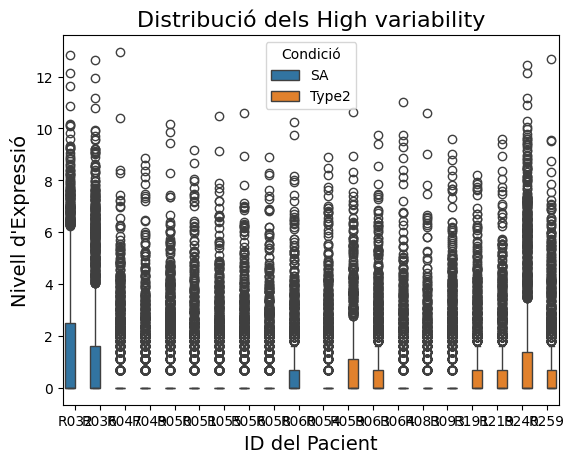

In [170]:
# Crear el gràfic de boxplot
sns.boxplot(data=df_high_variability_sample, x="record_id", y="Expression", hue="Condició", dodge=True)

plt.title("Distribució dels High variability", fontsize=16)
plt.xlabel("ID del Pacient", fontsize=14)
plt.ylabel("Nivell d'Expressió", fontsize=14)
